In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/Warehouse_and_Retail_Sales.csv')

In [6]:
df = df.dropna(subset=['ITEM TYPE', 'RETAIL SALES', 'WAREHOUSE SALES'])  # Remove rows with missing critical values
df['RETAIL SALES'] = pd.to_numeric(df['RETAIL SALES'], errors='coerce')
df['RETAIL TRANSFERS'] = pd.to_numeric(df['RETAIL TRANSFERS'], errors='coerce')
df['WAREHOUSE SALES'] = pd.to_numeric(df['WAREHOUSE SALES'], errors='coerce')

In [8]:
df['TOTAL SALES'] = df['RETAIL SALES'] + df['WAREHOUSE SALES']

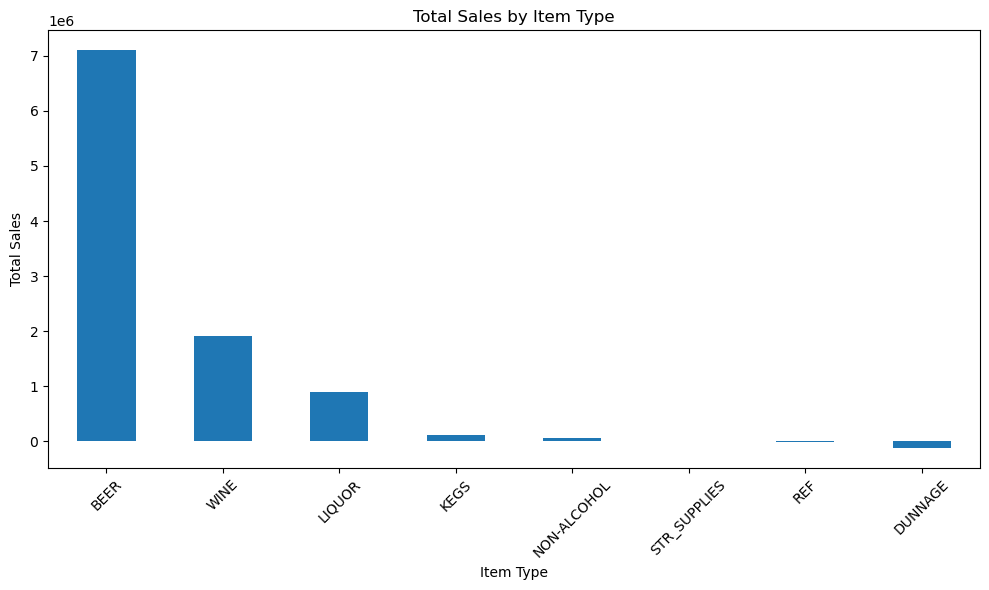

In [16]:
# Visualization 1: Sales by Item Type
plt.figure(figsize=(10, 6))
sales_by_type = df.groupby('ITEM TYPE')['TOTAL SALES'].sum().sort_values(ascending=False)
sales_by_type.plot(kind='bar')
plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

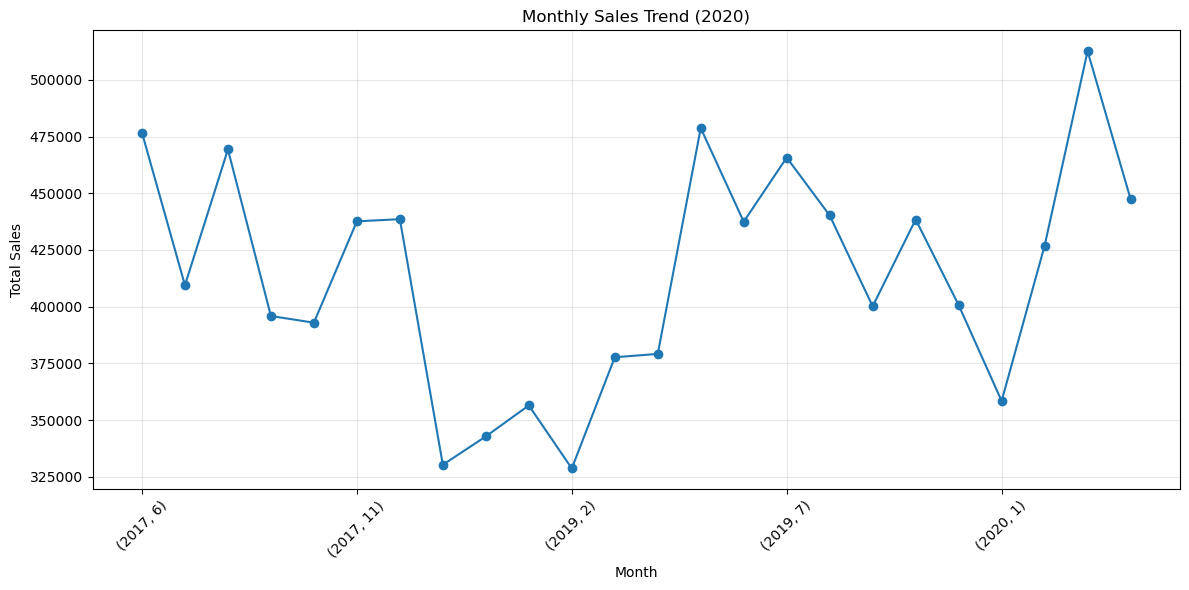

In [18]:
# Visualization 2: Monthly Sales Trend
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby(['YEAR', 'MONTH'])['TOTAL SALES'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend (2020)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

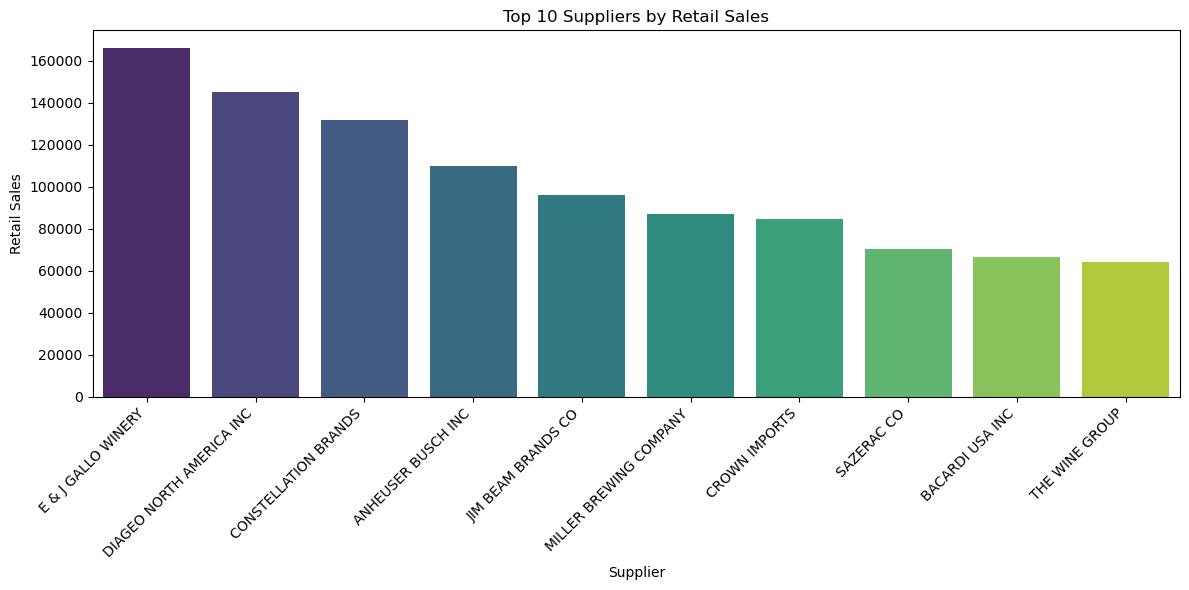

In [22]:
# Visualization 3: Top 10 Suppliers by Retail Sales
plt.figure(figsize=(12, 6))
top_suppliers = df.groupby('SUPPLIER')['RETAIL SALES'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_suppliers.index, y=top_suppliers.values, hue=top_suppliers.index, palette='viridis', legend=False)
plt.title('Top 10 Suppliers by Retail Sales')
plt.xlabel('Supplier')
plt.ylabel('Retail Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

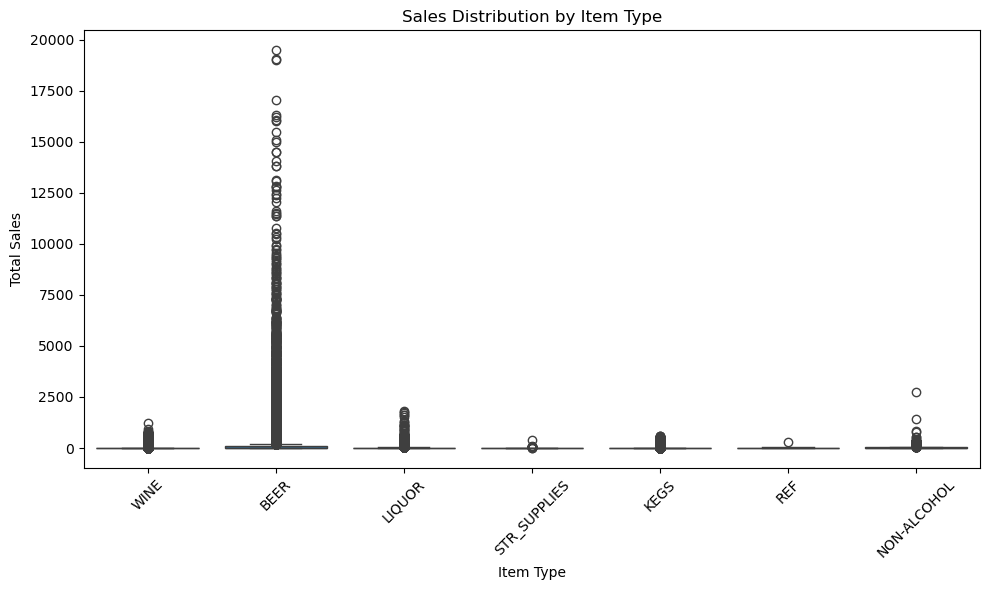

In [24]:
# Visualization 4: Sales Distribution by Item Type (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='ITEM TYPE', y='TOTAL SALES', data=df[df['TOTAL SALES'] > 0])
plt.title('Sales Distribution by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

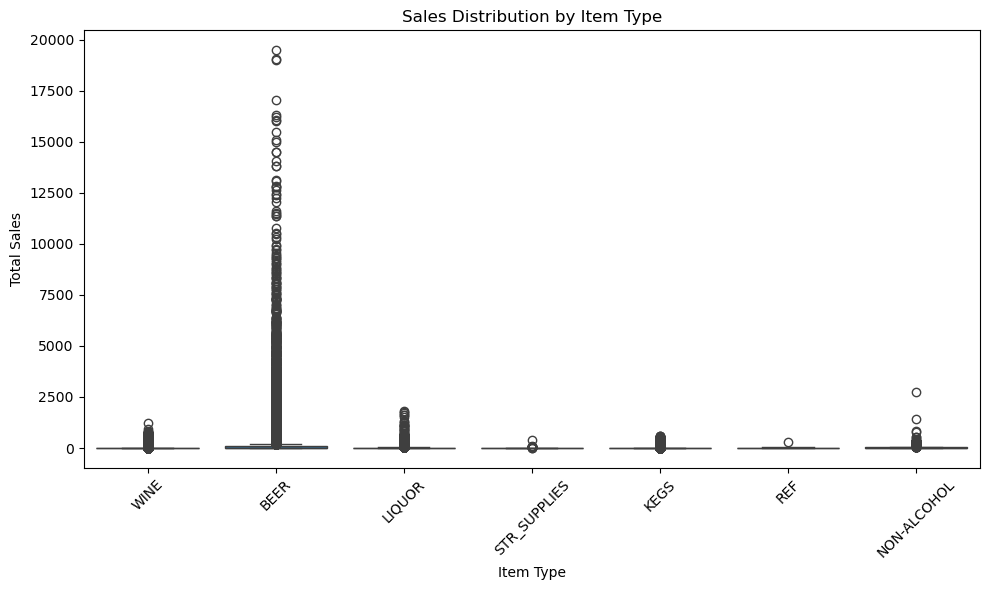

In [26]:
# Visualization 4: Sales Distribution by Item Type (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='ITEM TYPE', y='TOTAL SALES', data=df[df['TOTAL SALES'] > 0])
plt.title('Sales Distribution by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

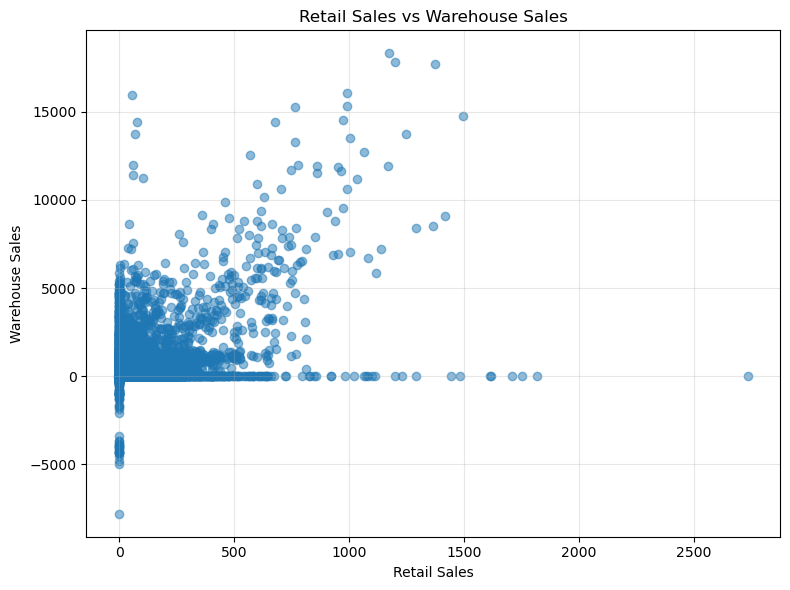

In [28]:
# Visualization 5: Retail vs Warehouse Sales Correlation
plt.figure(figsize=(8, 6))
plt.scatter(df['RETAIL SALES'], df['WAREHOUSE SALES'], alpha=0.5)
plt.title('Retail Sales vs Warehouse Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Warehouse Sales')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
# Additional Analysis
print("\nBasic Statistics:")
print(df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES', 'TOTAL SALES']].describe())

print("\nTop 5 Items by Total Sales:")
top_items = df.groupby('ITEM DESCRIPTION')['TOTAL SALES'].sum().sort_values(ascending=False).head()
print(top_items)

print("\nSales by Item Type:")
sales_by_type = df.groupby('ITEM TYPE')[['RETAIL SALES', 'WAREHOUSE SALES', 'TOTAL SALES']].sum()
print(sales_by_type)


Basic Statistics:
        RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES    TOTAL SALES
count  307641.000000     307641.000000    307641.000000  307641.000000
mean        7.024094          6.936555        25.294923      32.319017
std        30.986286         30.237382       249.918407     266.487962
min        -6.490000        -38.490000     -7800.000000   -7800.000000
25%         0.000000          0.000000         0.000000       1.000000
50%         0.320000          0.000000         1.000000       2.680000
75%         3.270000          3.000000         5.000000      10.500000
max      2739.000000       1990.830000     18317.000000   19491.000000

Top 5 Items by Total Sales:
ITEM DESCRIPTION
CORONA EXTRA LOOSE NR - 12OZ    328224.83
CORONA EXTRA 2/12 NR - 12OZ     257679.62
HEINEKEN LOOSE NR - 12OZ        189711.21
HEINEKEN 2/12 NR - 12OZ         162224.15
MILLER LITE 30PK CAN - 12OZ     148926.40
Name: TOTAL SALES, dtype: float64

Sales by Item Type:
              RETAIL SALES  WAR

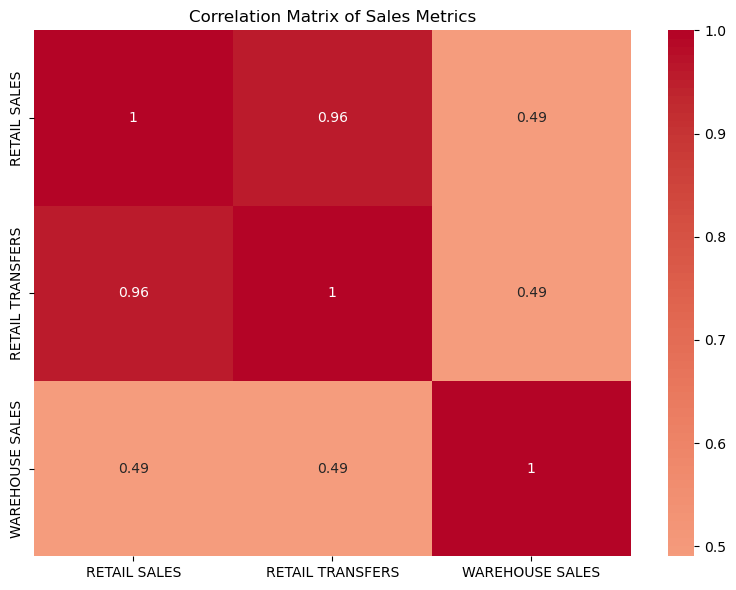

In [32]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
correlation_matrix = df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Sales Metrics')
plt.tight_layout()
plt.show()